## 첫번째 머신러닝

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fish_data = pd.read_csv('Fish.csv')
fish_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### 데이터 셋 준비하기
- 리스트에서 첫번째 도미의 길이는 25.4cm이고 무게는 242g이다. 각 도미의 특징을 길이와 무게로 표현한 것이다. 이런 특징을 feature라고 부른다.

In [3]:
# 도미 데이터
bream_length = fish_data[fish_data['Species'] == 'Bream']['Length2'].values
print(bream_length)
bream_weight = fish_data[fish_data['Species'] == 'Bream']['Weight'].values
print(bream_weight)


# 빙어 데이터
smelt_length = fish_data[fish_data['Species'] == 'Smelt']['Length2'].values
print(smelt_length)
smelt_weight = fish_data[fish_data['Species'] == 'Smelt']['Weight'].values
print(smelt_weight)

[25.4 26.3 26.5 29.  29.  29.7 29.7 30.  30.  30.7 31.  31.  31.5 32.
 32.  32.  33.  33.  33.5 33.5 34.  34.  34.5 35.  35.  35.  35.  36.
 36.  37.  38.5 38.5 39.5 41.  41. ]
[ 242.  290.  340.  363.  430.  450.  500.  390.  450.  500.  475.  500.
  500.  340.  600.  600.  700.  700.  610.  650.  575.  685.  620.  680.
  700.  725.  720.  714.  850. 1000.  920.  955.  925.  975.  950.]
[ 9.8 10.5 10.6 11.  11.2 11.3 11.8 11.8 12.  12.2 12.4 13.  14.3 15. ]
[ 6.7  7.5  7.   9.7  9.8  8.7 10.   9.9  9.8 12.2 13.4 12.2 19.7 19.9]


### 데이터 시각화
- scatter plot
- 길이 : x축 / 무게 : y축
- 생선의 길이가 길수록 무게가 많이 나간다고 생각하면 자연스럽다.
- 이렇게 그래프가 일직선에 가까운 형태로 나타나는 경우 linear(선형)적이라고 말한다.

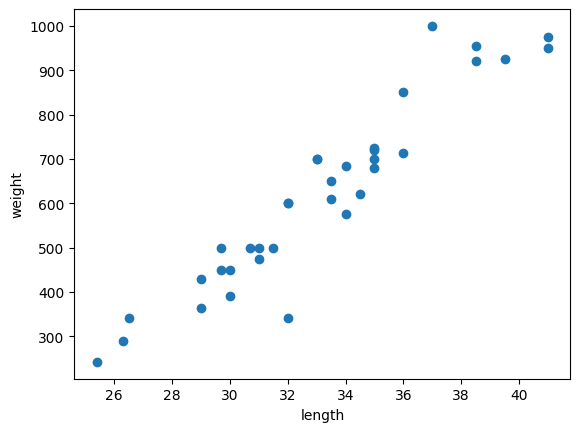

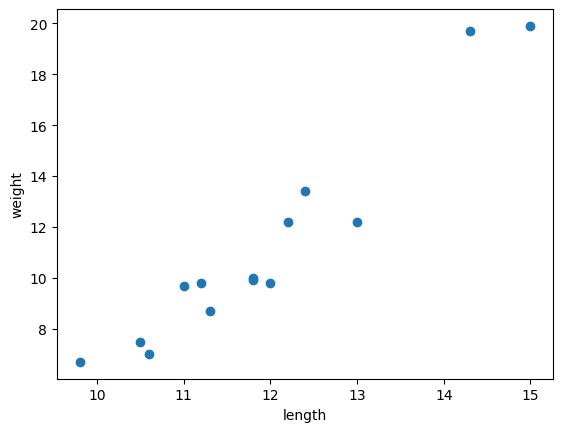

In [4]:
plt.scatter(bream_length, bream_weight)
plt.xlabel('length') # x축은 길이
plt.ylabel('weight') # y축은 무게
plt.show()

plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length') # x축은 길이
plt.ylabel('weight') # y축은 무게
plt.show()

### 첫번째 머신러닝 프로그램
- 도미와 빙어 데이터를 하나의 데이터로 합침
- 데이터를 2차원 리스트로 만듬 
    - 이때 하나의 생선 데이터를 sample이라고 부름 49개의 샘플이 있음
    - 사용하는 feature는 길이와 무게 2개
- 정답(label/target) 값을 생성
- k-최근접 이웃 알고리즘 사용
    - 어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용
    - n_neightbors 옵션은 가까운 몇개의 데이터를 참고할 지 정함
    - 데이터가 아주 많은 경우 사용하기 어렵움(데이터가 크기 때문에 메모리가 많이 필요하고 직선거리를 계산하는 데도 많은 시간이 필요)
    - _fit_X 속성에 전달한 데이터를 모두 가지고 있음
    - _y 속성에 target 을 가지고 있음
- 새 데이터 예측

In [5]:
length = bream_length.tolist() + smelt_length.tolist() # 도미 35개의 길이 리스트와 빙어 14개의 길이 리스트를 합침
weight = bream_weight.tolist() + smelt_weight.tolist()

# zip 함수는 나열된 리스트 각각에서 하나씩 원소를 꺼내 반환한다.
# length, weight 리스트를 2차원 리스트로
fish_data = [[l, w] for l, w in zip(length, weight)] 
print(fish_data)

# 정답 데이터
# 첫번째 생선은 도미 두번째 생선... 각각 어떤 생선인지 답을 만듬
# 머신러닝 알고리즘이 생선의 길이와 무게를 보고 도미와 빙어를 구분하는 규칙을 찾아야함
fish_target = [1] * 35 + [0] * 14 # 1: 도미 / 0: 빙어
print(fish_target)

# k-최근접 이웃 알고리즘
from sklearn.neighbors import KNeighborsClassifier
# 알고리즘 모델 객체 생성
kn = KNeighborsClassifier()

# 주어진 데이터로 알고리즘을 훈련
kn.fit(fish_data, fish_target)
# 정확도
print(kn.score(fish_data, fish_target)) # return 1.0 > 이 모델은 정확도가 100%이며 도미와 빙어를 완벽하게 분류
# 새로운 데이터의 정답을 예측한다. 이 메서드도 fit() 메서드와 마찬가지로 리스트의 리스트를 전달해야 한다.
kn.predict([[30, 600]]) # return 1 > 도미!

print(kn._fit_X)
print(kn._y)


[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1.0
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. 

In [50]:
kn49 = KNeighborsClassifier(n_neighbors=49) # 참고 데이터를 49개로 한모델
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target) # 0.7142857142857143 > 정확도가 낮아짐

0.7142857142857143

## 데이터 다루기

- 지도학습(supervised learning)
    - 데이터와 정답을 입력과 타깃이라 하고 이 둘을 합쳐 훈련 데이터라고 부른다.
    - 입력을 사용된 길이와 무게를 feature 라고 한다.
    - 정답(타깃)이 있으니 알고리즘이 정답을 맞히는 것을 학습
- 비지도학습(unsupervised learning)
    - 타깃 없이 입력 데이터만 사용
    - 데이터를 잘 파악하거나 변형하는 데 도움
- 강화학습(reinforcement learning)
    - 타깃이 아니라 알고리즘이 행동한 결과로 얻은 보상을 사용해 학습

### 훈련 셋과 테스트 셋
- 연습 문제와 시험 문제가 같다면 항상 100%의 정확도가 나올 것이다.
- 성능을 제대로 평가하려면 훈련 데이터와 평가 데이터가 달라야한다.


### 샘플링 편향
- 처음 35개 샘플을 훈련 셋, 나머지 14개의 샘플을 테스트 셋으로 선택해서 훈련시켜보자
- 정확도가 0.0이 나온다.
- 이는 훈련세트에 빙어 데이터가 하나도 들어 있지 않아서 생김

In [ ]:
print(fish_data[4]) # 인덱싱
print(fish_data[0:5]) # 슬라이싱

# 처음 35개 샘플을 훈련 세트로 선택하고 나머지 14개 샘플을 테스트 셋으로 선택
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

kn.fit(train_input, train_target)
kn.score(test_input, test_target) # return 0.0

### Numpy
- numpy는 고차원 배열을 핸들링하는 도구를 제공한다.
- arange() 함수를 사용하면 0 ~ 48 까지 1씩 증가하는 인덱스를 만들 수 있다.
- 그 다음 이 인덱스를 랜덤하게 섞는다.

In [ ]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr)
print(input_arr.shape)

In [ ]:
np.random.seed(42) # 난수를 생성하기 위한 정수 초기값을 지정. 초기값이 같으면 동일한 난수를 뽑을 수 있음. 랜덤함수의 결과를 동일하게 쟇녀한고 싶을 때 사용
index = np.arange(49) # 0 ~ 48 까지 1씩 증가하는 배열을 생성
np.random.shuffle(index) # 주어진 배열을 무작위로 섞음
print(index)

In [60]:
# 배열 인덱싱 한번에 여러개의 원소를 선택가능
# 2번째, 4번째 샘플 선택 출력
print(input_arr[[1, 3]]) 

[[ 26.3 290. ]
 [ 29.  363. ]]


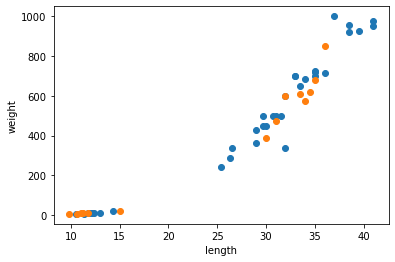

In [62]:
# 섞은 데이터 셋 준비
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

# 훈련 셋과 테스트 셋에 도미와 빙어가 잘 섞여 있는지 그래프로 확인
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [65]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [66]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [67]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## 데이터 전처리
- numpy로 input data, target data 준비하기
- scikit-learn으로 훈련 셋과 테스트 셋 나누기

### numpy로 input data, target data 준비하기

In [71]:
# 리스트를 일렬로 세운다음 나란히 연결하여 tuple로 전달한다.
np.column_stack(([1, 2, 3], [4, 5, 6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [8]:
fish_data = np.column_stack((length, weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [9]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### scikit-learn으로 훈련 셋과 테스트 셋 나누기
- train_test_split 이 함수는 기본적으로 25%를 테스트 셋으로 떼어 낸다.
- stratify 옵션을 사용하여 타깃 데이터를 전달하면 비율에 맞게 데이터를 나눈다. (처음 옵션을 사용하지 않았을 때 도미의 비율이 너무 많았지만 옵션을 사용한 후 비슷한 비율이 되었다.)

In [6]:
from sklearn.model_selection import train_test_split

In [10]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
print(test_target)

(36, 2) (13, 2)
(36,) (13,)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [11]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [12]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [83]:
print(kn.predict([[25, 150]])) # 도미(1) 가 아닌 빙어(0) 가 나옴

[0.]


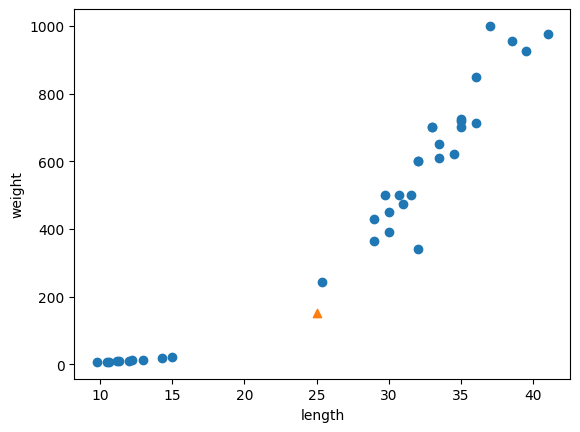

In [13]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 샘플 데이터는 도미 쪽에 가깝지만 예측값은 빙어가 나옴
- k-최근접 이웃은 주변의 샘플 중에서 다수인 클래스를 예측으로 사용한다.
- KNeighborsClassifier 클래스는 주어진 샘플에서 가장 가까운 이웃을 찾아주는 kneighbors()메서드를 제공
- 테스트값 [25, 150]의 이웃 샘플과의 거리와 이웃샘플 인덱스를 반환받을 수 있다.

In [14]:
distance, indexes = kn.kneighbors([[25, 150]])

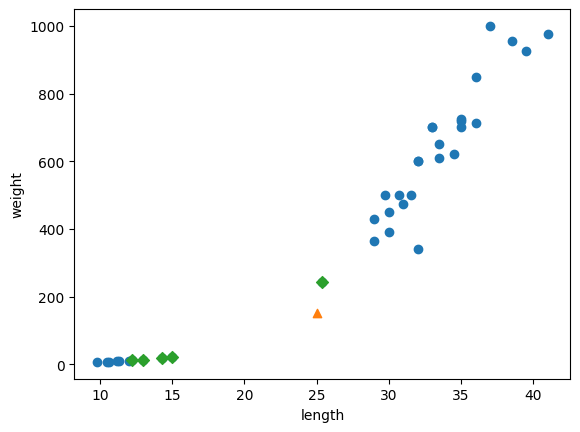

In [19]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 삼각형 샘플에서 가장 가까운 5개의 샘플이 초록 다이아몬드로 표시됨
- 가장 가까운 이웃에 도미가 하나밖에 포함되지 않음

In [16]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [17]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [18]:
print(distance)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


- 92는 도미고 나머지 130대는 빙어인데 차이가 얼마나지 않는것이 이상하다.
- x축은 범위가 좁고(10 ~ 40) y축은 범위가 넓다(0 ~ 1000)
- 따라서 y축으로 조금만 멀어져도 거리가 아주 크게 계산된다.
- x축의 범위를 동일하게 0 ~ 1000으로 맞춰보자.

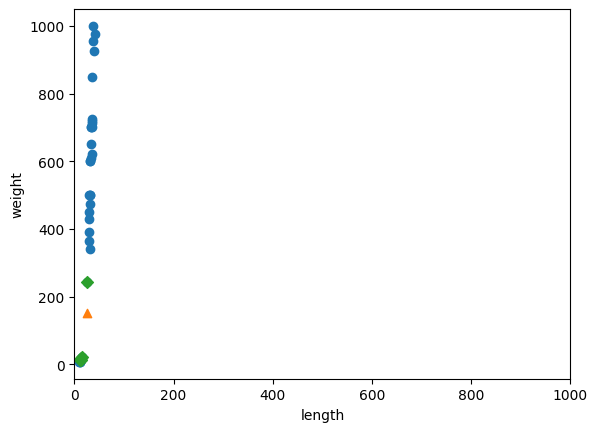

In [20]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 모든 데이터가 수직으로 늘어선 형태가 되었다.
- 이런 상태에서 x축은 크게 영향을 미치지 못하고 오직 y축 값만 고려대상이 된다.
- 두 feature(무게, 길이)의 값이 놓인 범위가 매우 다르다. 이를 두 feature의 scale이 다르다고 한다.
- 이런 경우 feature 값을 일정한 기준으로 맞춰줘야 한다.
- 이런 작업을 데이터 전처리라고 한다.

### 데이터 전처리
- 가장 널리 사용하는 방법은 표준 점수이다.(혹은 z점수)
- 표준점수는 각 특성값이 평균에서 표준편차의 몇배만큼 떨어져있는지를 나타낸다. 
- 계산하는 방법은 평균을 빼고 표준편차를 나누어주면 된다. 
```python
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
```
- axis=0으로 지정하면 행을 따라 각 열의 통계값을 계산

In [22]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [23]:
train_scaled = (train_input - mean) / std

- numpy는 train_input의 모든 행에서 mean에 있는 두 평균값을 빼준다.
- 그 다음 std에 있는 두 표준편차를 다시 모든 행에 적용한다.
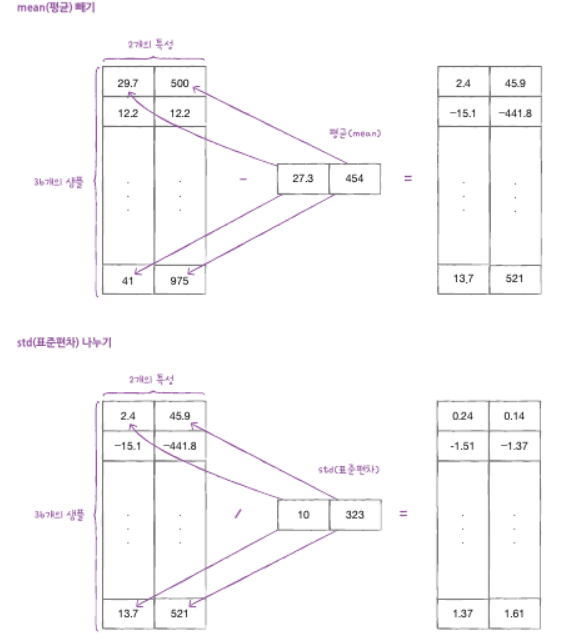

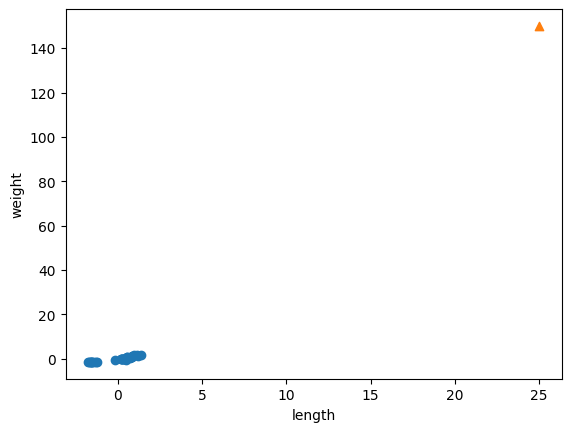

In [24]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 샘플(25, 150)또한 동일한 비율로 변환해야한다.

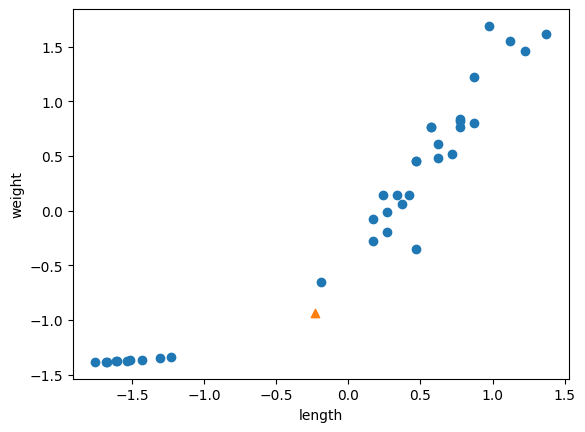

In [27]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [32]:
kn.fit(train_scaled, train_target) # 스케일링한 데이터 셋으로 다시 훈련
test_scaled = (test_input - mean) / std # 테스트 셋도 동일한 비율로 스케일링 / training set의 평균과 표준편차로 test set의 scale을 바꿔야함

kn.score(test_scaled, test_target) # 정확도 테스트


1.0

In [33]:
print(kn.predict([new]))

[1.]


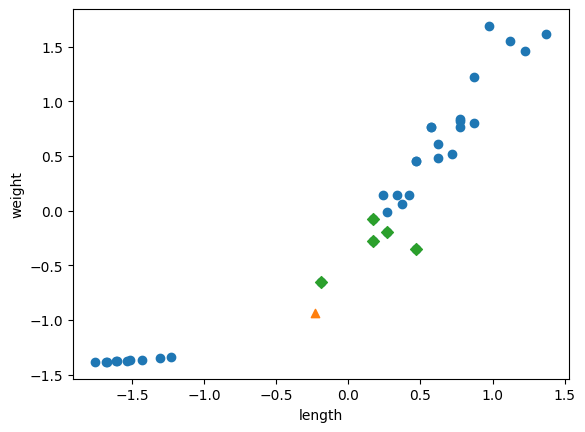

In [36]:
distance, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 정리
- 데이터 전처리: 머신러닝 모델에 훈련 데이터를 주입하기 전에 가공하는 단계
- 표준 점수: training set에 scale을 바꾸는 대표적인 방법중 하나/ 표준점수를 얻으려면 특성의 평균을 빼고 표준편차로 나눔/ 반드시 training set의 평균과 표준편차로 test set의 scale을 바꿔야함
- 브로드 캐스팅: 크기가 다른 넘파이 배열에서 자동으로 사칙 연산을 모든 행이나 열로 확장하여 수행하는 기능

## Reference
- [Fish.csv](https://www.kaggle.com/datasets/aungpyaeap/fish-market?select=Fish.csv)